In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
#histories.append(history)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 155s 3ms/step - loss: 0.2697 - acc: 0.9168 - val_loss: 0.0568 - val_acc: 0.9810
Epoch 2/12
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0886 - acc: 0.9737 - val_loss: 0.0399 - val_acc: 0.9860
Epoch 3/12
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0658 - acc: 0.9799 - val_loss: 0.0334 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0526 - acc: 0.9844 - val_loss: 0.0290 - val_acc: 0.9906
Epoch 5/12
60000/60000 [====================

NameError: ignored

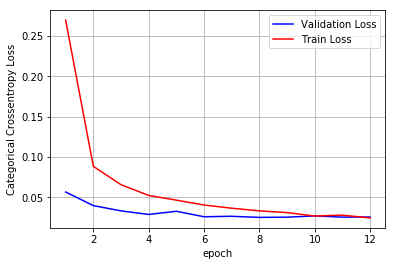

In [3]:
#score = model_relu.evaluate(X_test, Y_test, verbose=0) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
#print(x)

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
#print(ty)
plt_dynamic(x, vy, ty, ax)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_cols, img_rows, 1)
    x_test = x_test.reshape(x_test.shape[0], img_cols, img_rows, 1)
    input_shape = (img_cols, img_rows, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# 3 layer CNN


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0958 - acc: 0.9725 - val_loss: 0.0483 - val_acc: 0.9832
Epoch 2/12
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0340 - acc: 0.9901 - val_loss: 0.0299 - val_acc: 0.9898
Epoch 3/12
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0230 - acc: 0.9931 - val_loss: 0.0266 - val_acc: 0.9910
Epoch 4/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0167 - acc: 0.9948 - val_loss: 0.0282 - val_acc: 0.9907
Epoch 5/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0114 - acc: 0.9968 - val_loss: 0.0256 - val_acc: 0.9923
Epoch 6/12
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0088 - acc: 0.9974 - val_loss: 0.0217 - val_acc: 0.9929
Epoch 7/12
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0066 - acc: 0.9983 - val_loss: 0.0223 -

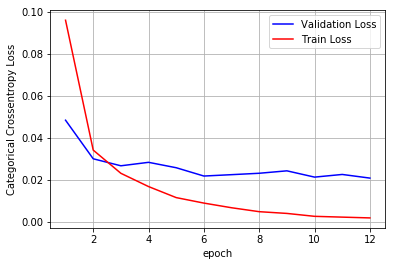

In [4]:
#3 Convolution layer network with kernel size = (3,3)
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
#print(x)

vy = history.history['val_loss']
ty = history.history['loss']
#print(ty)
plt_dynamic(x, vy, ty, ax)

# 5 Layer CNN 

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 192s 3ms/step - loss: 0.2834 - acc: 0.9137 - val_loss: 0.0682 - val_acc: 0.9813
Epoch 2/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0946 - acc: 0.9738 - val_loss: 0.0464 - val_acc: 0.9882
Epoch 3/12
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0752 - acc: 0.9789 - val_loss: 0.0490 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0621 - acc: 0.9830 - val_loss: 0.0338 - val_acc: 0.9903
Epoch 5/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0535 - acc: 0.9856 - val_loss: 0.0267 - val_acc: 0.9917
Epoch 6/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0456 - acc: 0.9877 - val_loss: 0.0245 - val_acc: 0.9928
Epoch 7/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0411 - acc: 0.9885 - val_loss: 0.0269 - 

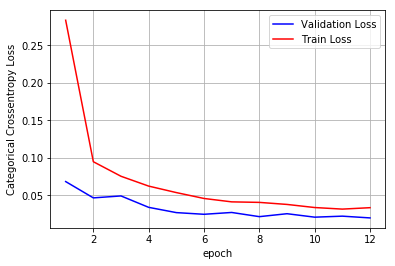

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=5, activation = 'relu'))
model.add(Conv2D(32, kernel_size=5, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=3, activation = 'relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])




history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
#print(x)

vy = history.history['val_loss']
ty = history.history['loss']
#print(ty)
plt_dynamic(x, vy, ty, ax)


# 7 Layer CNN 

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 332s 6ms/step - loss: 0.3652 - acc: 0.8895 - val_loss: 0.0601 - val_acc: 0.9824
Epoch 2/12
60000/60000 [==============================] - 330s 5ms/step - loss: 0.1199 - acc: 0.9676 - val_loss: 0.0453 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 333s 6ms/step - loss: 0.0888 - acc: 0.9768 - val_loss: 0.0548 - val_acc: 0.9842
Epoch 4/12
60000/60000 [==============================] - 333s 6ms/step - loss: 0.0716 - acc: 0.9809 - val_loss: 0.0579 - val_acc: 0.9867
Epoch 5/12
60000/60000 [==============================] - 331s 6ms/step - loss: 0.0599 - acc: 0.9838 - val_loss: 0.0373 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 331s 6ms/step - loss: 0.0556 - acc: 0.9853 - val_loss: 0.0342 - val_acc: 0.9907
Epoch 7/12
60000/60000 [==============================] - 333s 6ms/step - loss: 0.0506 - acc: 0.9863 - val_loss: 0.0257 - 

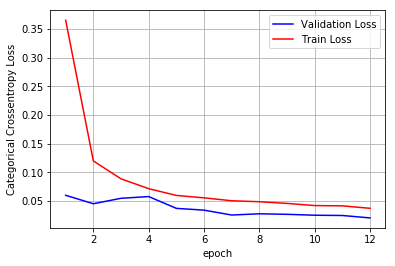

In [5]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation = 'relu'))
model.add(Conv2D(32, kernel_size=3, activation = 'relu',padding='same'))

model.add(Conv2D(32, kernel_size=3, activation = 'relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3,activation = 'relu',padding='same'))


model.add(Conv2D(64, kernel_size=3,activation = 'relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3,activation = 'relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(128, kernel_size=3, activation = 'relu',padding='same'))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dropout(0.4))
model.add(Dense(128, activation = "relu"))

model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
#print(x)

vy = history.history['val_loss']
ty = history.history['loss']
#print(ty)
plt_dynamic(x, vy, ty, ax)



# 3 Layer CNN with data augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0919 - acc: 0.9732 - val_loss: 0.0458 - val_acc: 0.9847
Epoch 2/12
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0321 - acc: 0.9907 - val_loss: 0.0297 - val_acc: 0.9906
Epoch 3/12
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0213 - acc: 0.9938 - val_loss: 0.0246 - val_acc: 0.9915
Epoch 4/12
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0148 - acc: 0.9954 - val_loss: 0.0241 - val_acc: 0.9922
Epoch 5/12
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0103 - acc: 0.9970 - val_loss: 0.0229 - val_acc: 0.9919
Epoch 6/12
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0072 - acc: 0.9980 - val_loss: 0.0261 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0059 - acc: 0.9984 - val_loss: 0.0173 - 

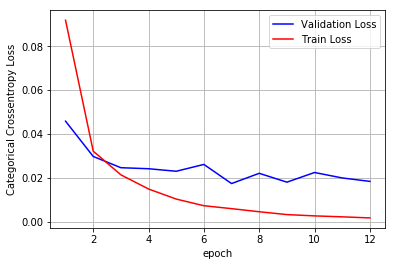

In [7]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten
model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
#print(x)

vy = history.history['val_loss']
ty = history.history['loss']
#print(ty)
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="glorot_normal")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="glorot_normal")`
  del sys.path[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 136s 2ms/step - loss: 0.2667 - acc: 0.9176 - val_loss: 0.0624 - val_acc: 0.9804
Epoch 2/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0876 - acc: 0.9741 - val_loss: 0.0396 - val_acc: 0.9869
Epoch 3/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0662 - acc: 0.9797 - val_loss: 0.0339 - val_acc: 0.9886
Epoch 4/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0544 - acc: 0.9837 - val_loss: 0.0327 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0464 - acc: 0.9857 - val_loss: 0.0323 - val_acc: 0.9888
Epoch 6/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0422 - acc: 0.9873 - val_loss: 0.0291 - val_acc: 0.9903
Epoch 7/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0376 - acc: 0.9887 - val_loss: 0.0289 - 

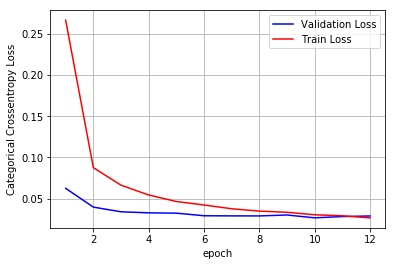

In [8]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu',init='glorot_normal'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax',init='glorot_normal'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
#print(x)

vy = history.history['val_loss']
ty = history.history['loss']
#print(ty)
plt_dynamic(x, vy, ty, ax)

#model.compile(loss='categorical_crossentropy', optimizer=RMSprop())
#model.fit(X_train, Y_train, batch_size=32, nb_epoch=25,
          #verbose=1, show_accuracy=True, validation_data=(X_test, Y_test))

In [9]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Test accuracy"]

x.add_row(["Conv 2 Layer",99.26])
x.add_row(["Conv 3 Layer",99.45])
x.add_row(["Conv 5 Layer",99.48])
x.add_row(["Conv 7 Layer",99.44])
x.add_row(["Conv 3 Layer with (32,32,64) filters (data augmentation)",99.41])
x.add_row(["Conv 3 Layer with (32,64,128) filters(data augmentation)",99.2])


print(x)

+----------------------------------------------------------+---------------+
|                          Model                           | Test accuracy |
+----------------------------------------------------------+---------------+
|                       Conv 2 Layer                       |     99.26     |
|                       Conv 3 Layer                       |     99.45     |
|                       Conv 5 Layer                       |     99.48     |
|                       Conv 7 Layer                       |     99.44     |
| Conv 3 Layer with (32,32,64) filters (data augmentation) |     99.41     |
| Conv 3 Layer with (32,64,128) filters(data augmentation) |      99.2     |
+----------------------------------------------------------+---------------+


Observation:
1. Various CNN architecture is implemented on MNIST dataset and the test accuracy has been calculated.
2. Maximum accuracy achieved, using 5 convolution layer architecture is 99.5. From the error plot, it is found that the validation and train loss converges, when the model is trained for 12 epochs.
3. The model performs well for data augmented x_train data with accuracy of 99.2.
4. Based on the number of convolution filters, some of the architectures overfits.(3 Conv layer,Conv 3 Layer with (32,32,64) filters (data augmentation))